In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [25]:
#define image1 here
image1 = np.array([[150, 151, 153, 155,156, 155,154], [150, 151, 153, 155,156, 155,154],[150, 151, 153, 155,156, 155,154],
                [150, 151, 153, 155,156, 155,154],[150, 151, 153, 155,156, 155,154]] , dtype = 'uint8' )

        



In [26]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])

    return(hist)

Text(0.5, 1.0, 'histogram')

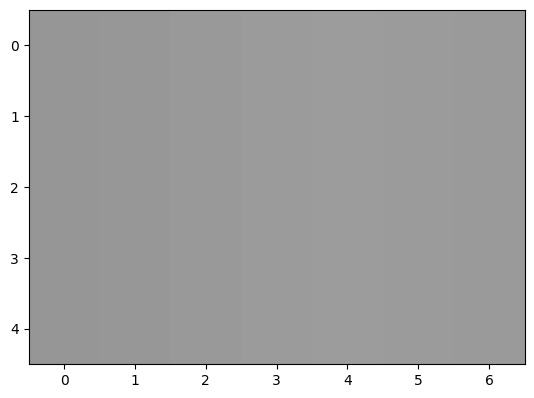

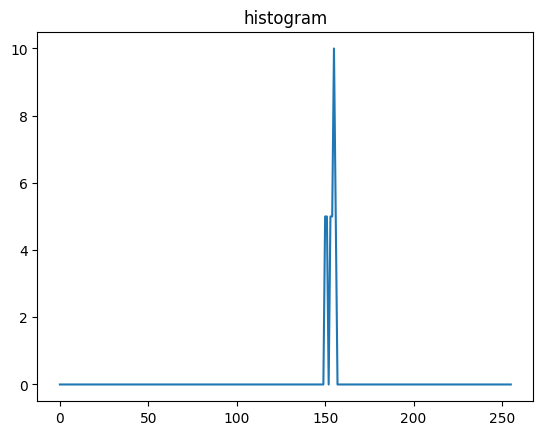

In [27]:
#dont change this cell

plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')


In [28]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image ):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
    
  '''
  L = 256
  minpix= image.min()
  maxpix= image.max()
  output_image = image.copy()
  output_image = np.round(((image - minpix)/(maxpix - minpix))*(L-1))
  return output_image.astype('uint8')


Text(0.5, 1.0, 'new histogram')

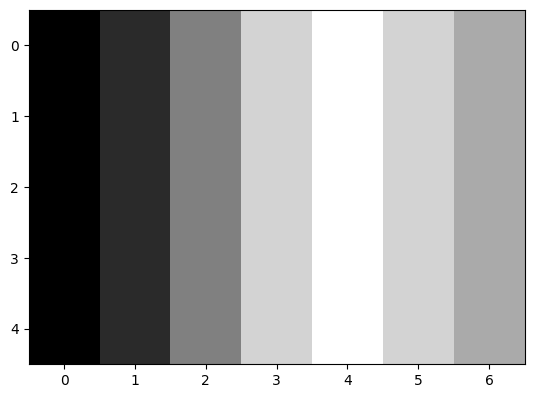

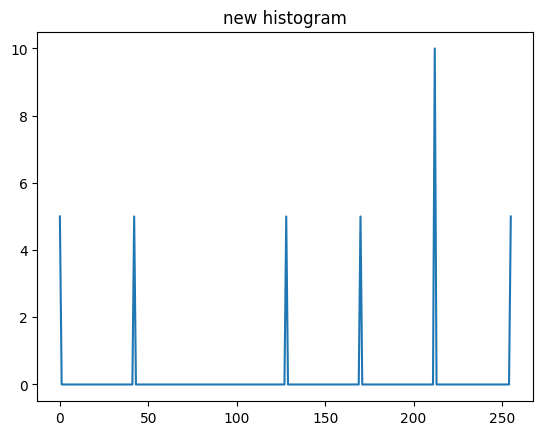

In [29]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


Text(0.5, 1.0, 'histogram')

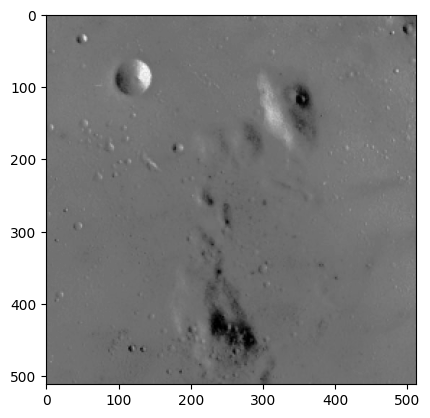

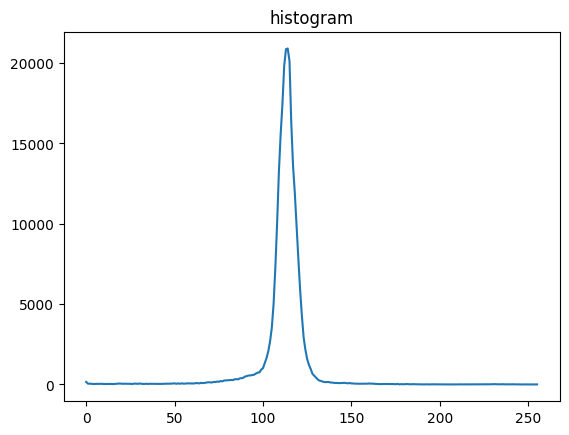

In [30]:
# first read the image and show it.(image2)
image2 = cv2.imread('Q3_image//image2.jpg' , 0)
plt.imshow(image2,cmap='gray',vmin=0,vmax=255)
plt.figure()

plt.plot(calc_hist(image2))
plt.title('histogram')





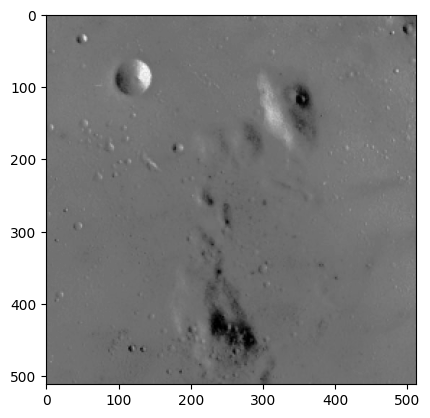

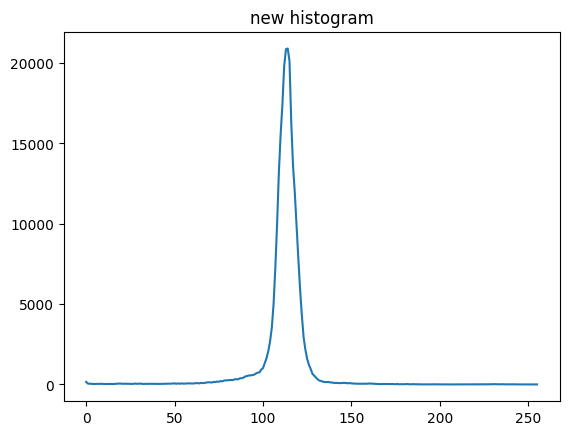

In [31]:
#use stretch function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('new histogram')
print()


In [32]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  L = 256

  hist_im = calc_hist(image2)
  output_image = image.copy()
  allpix = hist_im.sum()

  cdf = hist_im.cumsum()
  cdf = cdf/allpix * 100
  hist_reverse = np.flipud(hist_im)
  cdf_reverse= hist_reverse.cumsum()
  cdf_reverse = cdf_reverse/allpix * 100 

  maxp = 255 - np.where(cdf_reverse >= 3 )[0][0]
  minp = np.where(cdf >= 3 )[0][0]
  output_image = np.round(((image - minp)/(maxp - minp))*(L-1)).astype('uint8')

  return output_image


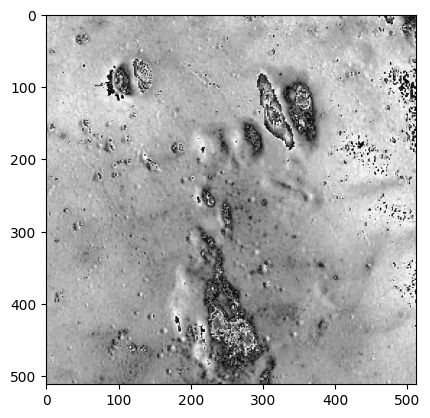

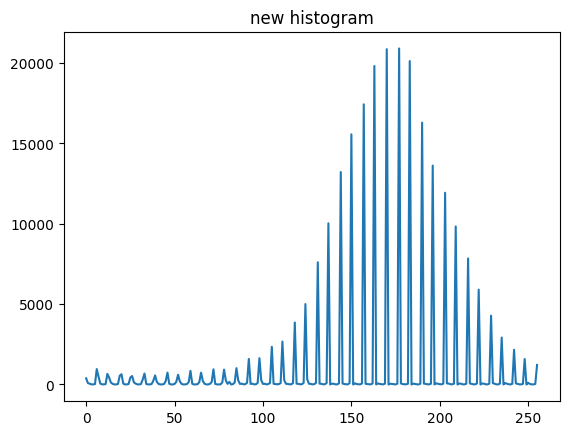

In [33]:
#try your new function and show the result

plt.imshow(modified_stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(modified_stretch_hist(image2)))
plt.title('new histogram')
print()





